In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import pickle

In [5]:
# Loading Data
df=pd.read_csv('data.csv')

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
# Data Preprocessing
value=df['statezip'].str.split(' ').str[1]
df['zip']=value.astype(int)

In [9]:
# Removing Unnecessary Columns
df.drop(['street','statezip','country','date'],axis=1,inplace=True)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,zip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052


In [11]:
# Encoding Categorical Data
city_encoder=LabelEncoder()
df['city']=city_encoder.fit_transform(df['city'])

In [12]:
# Save city->zip mapping (with city names, not encoded ints)
city_zip_mapping = (
    df.assign(city_name = city_encoder.inverse_transform(df["city"]))
      .groupby("city_name")["zip"].unique()
      .apply(list)
      .to_dict()
)

In [13]:
# Bathrooms and Floors should be integers
df[['bathrooms','floors']]=df[['bathrooms','floors']].round().astype(int)

In [14]:
# Feature Engineering
df['living_less_than_lot'] = df['sqft_living'] < df['sqft_lot']
df['living_less_than_lot'].value_counts()

living_less_than_lot
True     4429
False     171
Name: count, dtype: int64

In [15]:
# Dropping false values
df=df[df['sqft_living']<df['sqft_lot']]
df.shape

(4429, 16)

In [16]:
# Drop the feature engineering column
df.drop(columns='living_less_than_lot',inplace=True)

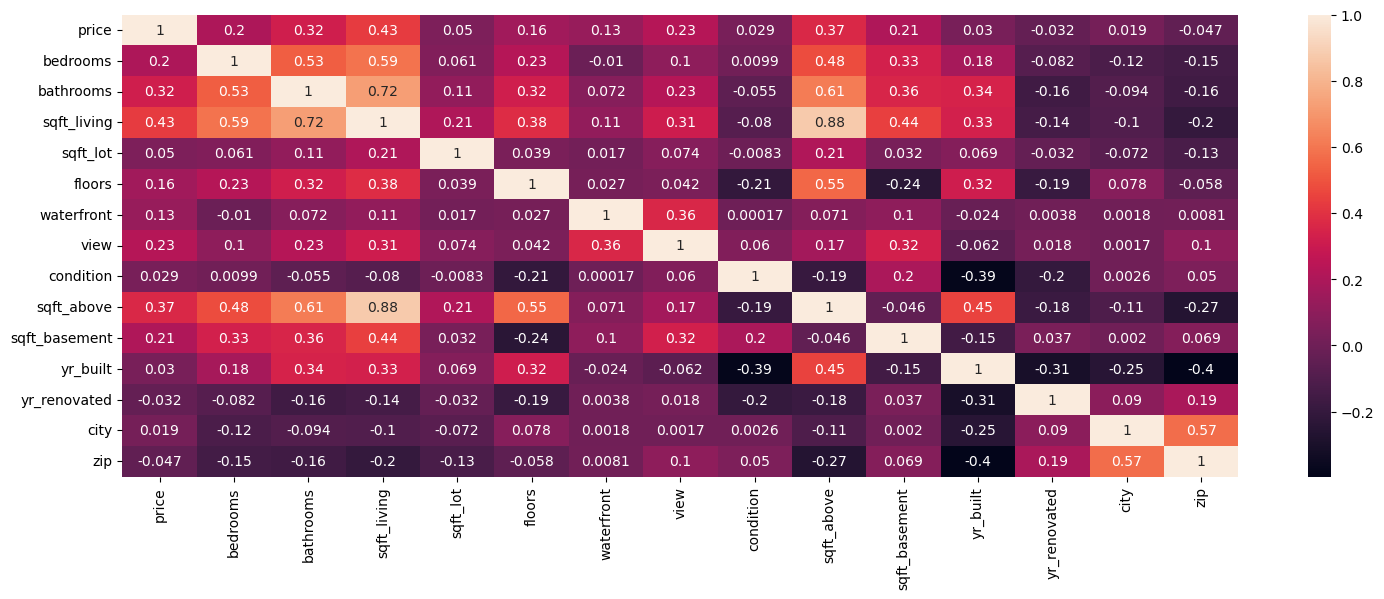

In [17]:
# Exploratory Data Analysis
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

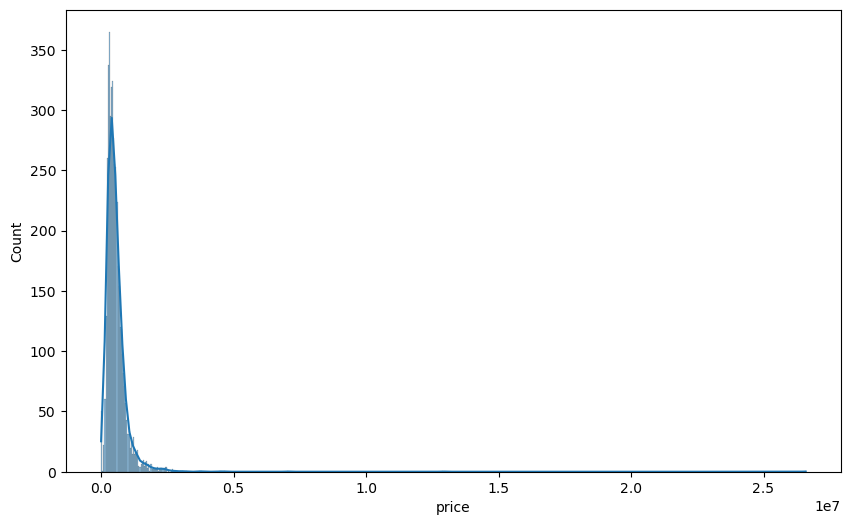

In [18]:
# Distribution of target variable
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True)
plt.show()

In [19]:
# Outlier Removal
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
IQR=q3-q1
max_range=q3+IQR*1.5
df=df[df['price']<max_range]

<Axes: >

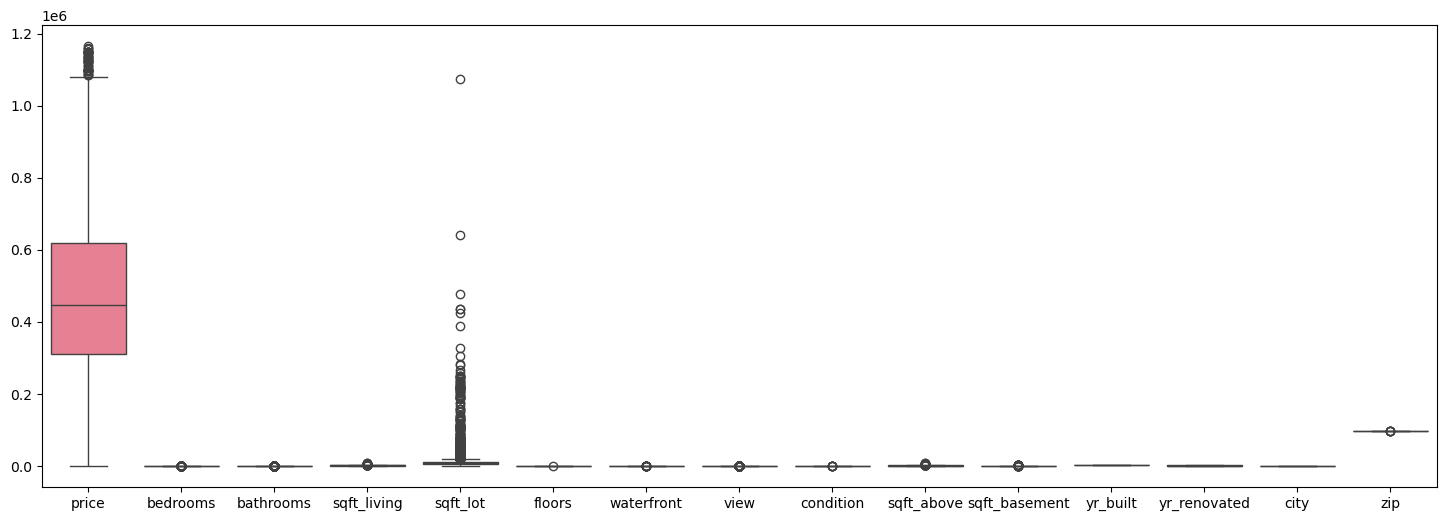

In [20]:
plt.figure(figsize=(18,6))
sns.boxplot(df)

In [21]:
# Log Transformation
df['sqft_lot'] = np.log1p(df['sqft_lot'])

In [22]:
df.shape

(4198, 15)

In [23]:
# Feature Selection
X=df.drop(columns='price')
y=df['price']

In [24]:
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=42)

In [25]:
# Feature Scaling
mms=MinMaxScaler()
X_train_scaled=mms.fit_transform(X_train)
X_test_scaled=mms.transform(X_test)

In [26]:
# Linear Regression Model Training and Evaluation
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train)*100,lr.score(X_test_scaled,y_test)*100

(42.52865608203004, 55.02113755633461)

In [27]:
# Decision Tree Regressor Model Training and Evaluation
dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train_scaled,y_train)
dtr.score(X_train_scaled,y_train)*100,dtr.score(X_test_scaled,y_test)*100

(50.935683763214314, 69.5147386063028)

In [28]:
# Random Forest Regressor Model Training and Evaluation
rf=RandomForestRegressor(random_state=42,)
rf.fit(X_train_scaled,y_train)
rf.score(X_train_scaled,y_train)*100,rf.score(X_test_scaled,y_test)*100

(95.18340712462715, 77.80910047558164)

In [29]:
# Model Performance using R2 Score
y_pred=rf.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.7780910047558165

In [30]:
# Hyperparameter Tuning
# para = {
#     'n_estimators': [180, 200,260,280, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_leaf': [1, 2],
#     'min_samples_split': [2,3, 5],
#     'criterion': ['squared_error', 'absolute_error'],
#     'max_features': ['sqrt', 'log2']
# }

# gd=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=para,cv=3,n_jobs=-1,scoring='r2')
# gd.fit(X_train_scaled,y_train)
# gd.best_params

In [31]:
# Best Parameters after Hyperparameter Tuning
rf1=RandomForestRegressor(random_state=21,n_estimators=280,min_samples_split=10,min_samples_leaf=3,max_depth=None,criterion='absolute_error')
rf1.fit(X_train_scaled,y_train)
rf1.score(X_train_scaled,y_train)*100,rf1.score(X_test_scaled,y_test)*100

(82.31584362193973, 82.0958815464344)

In [32]:
# To save model
with open('housepricemodel.pkl','wb') as f:
	pickle.dump(rf1,f)
with open("city_encoder.pkl","wb") as f:
    pickle.dump(city_encoder, f)
with open("city_zip_mapping.pkl", "wb") as f:
    pickle.dump(city_zip_mapping, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(mms, f)